# Import libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [68]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Gene families

In [69]:
gene_families_clean = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_clean.tsv"), index_col=0, sep="\t")
gene_families_clean

,UniRef90_A0A014AUH4,UniRef90_A0A015QIN6,UniRef90_A0A015S3B6,UniRef90_A0A015SWD5,UniRef90_A0A015T2E3,UniRef90_A0A015TGA7,UniRef90_A0A015WBF1,UniRef90_A0A015WY92,UniRef90_A0A015Y6C2,UniRef90_A0A015YJI0,...,UniRef90_W8TAD5,UniRef90_W8TB91,UniRef90_W8TFY6,UniRef90_W8TUT7,UniRef90_W8TZZ8,UniRef90_W8ZG15,UniRef90_W8ZS14,UniRef90_W9BC30,UniRef90_X1RCG3,UniRef90_X6LTD6
id,,,,,,,,,,,,,,,,,,,,,
magic.0001,0.000000,0.000000,44.457278,199.783660,41.814699,0.000000,0.000000,591.026625,276.562500,0.000000,...,511.564968,19.486271,40.851298,359.375,247.933884,350.515464,291.139241,1.111969,0.000000,0.000000
magic.0004,0.000000,34.285714,59.178439,0.000000,0.000000,0.000000,9.090909,0.000000,140.625000,0.000000,...,332.500803,26.231543,34.888664,296.875,190.082645,360.824742,347.944991,0.263367,14.539656,0.000000
magic.0006,0.000000,6.944444,0.000000,0.000000,0.000000,0.000000,0.000000,27.322404,0.000000,0.000000,...,0.000000,0.000000,1.666415,0.000,10.416667,0.000000,0.000000,0.000000,990.235550,416.014948
magic.0007,57.445892,0.000000,172.743928,0.000000,0.000000,50.761421,2666.724242,7.125971,1455.820485,2048.349289,...,666.666667,136.775362,45.845493,1000.000,520.942982,847.222222,1074.423480,0.000000,372.948145,81.190691
magic.0008,0.000000,4.269234,13.150502,0.000000,0.000000,0.000000,206.829826,0.000000,129.587299,95.670672,...,366.494144,22.037754,4.577654,78.125,99.173554,134.020619,113.924051,0.804417,205.859146,30.615428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,73.979335,13.289183,516.516517,302.973479,562.961600,9868.473384,625.737845,56.426332,968.017841,234.014858,...,0.000000,0.000000,5.759539,0.000,0.000000,0.000000,0.000000,0.000000,5.076142,0.000000
magic.6597,703.259763,3682.343782,1024.024024,25600.162074,5468.801893,1038.005262,1837.462615,34962.372606,604.076023,655.933621,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
magic.6598,0.000000,6.896552,888.888889,2230.007613,4409.300252,1688.559361,340.359101,1849.708667,249.757473,78.896627,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,18.518519,0.000000,0.000000,0.000000


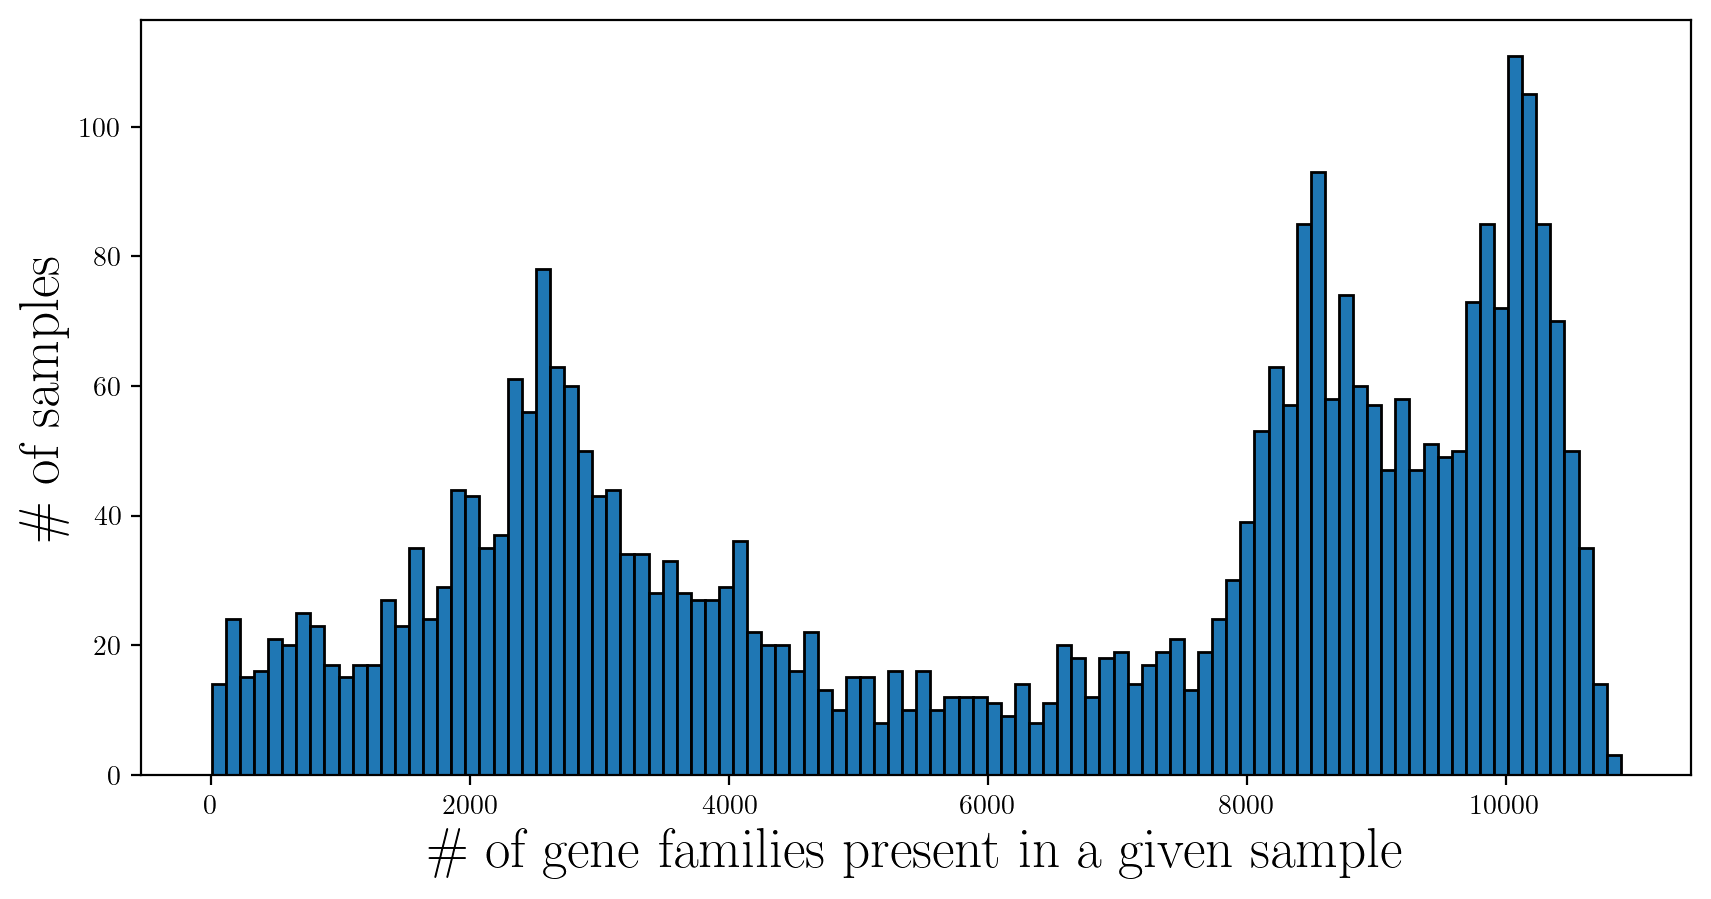

In [70]:
plt.figure(figsize=(10, 5), dpi=200)

gene_presence = (gene_families_clean > 0)
counts = gene_presence.sum(axis=1)

plt.hist(counts, bins=100, edgecolor="black")
plt.xlabel("\# of gene families present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

In [72]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)

In [76]:
metadata["Sequencing_Project_num"] = metadata["Sequencing_Project"].apply(lambda x : x.split("_")[2])

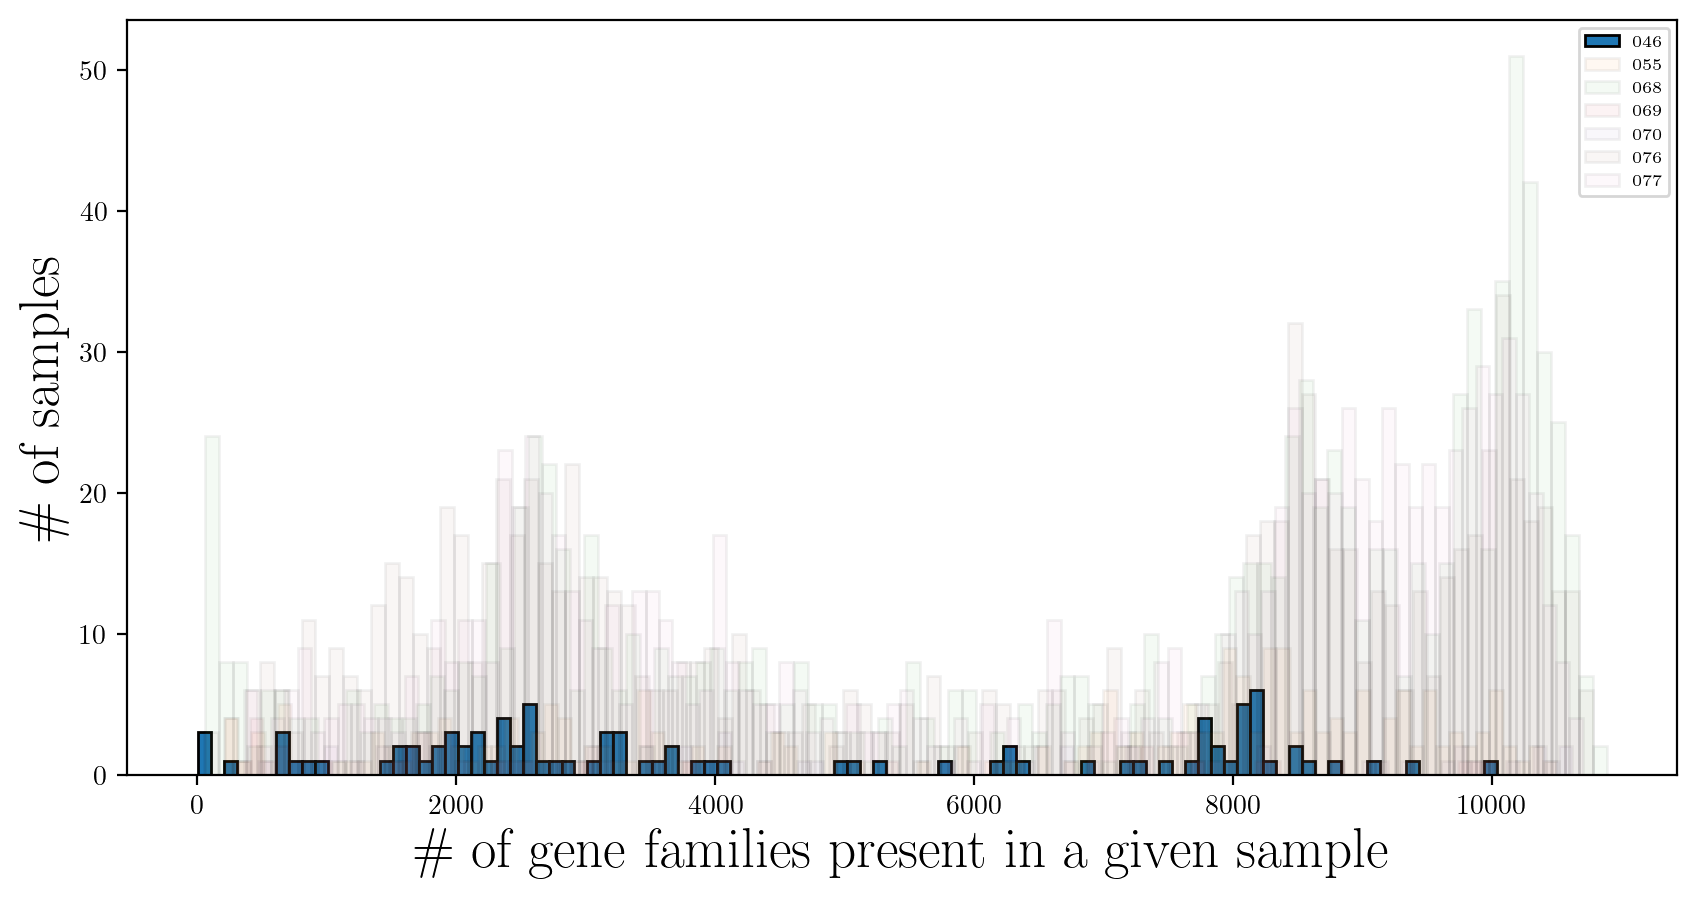

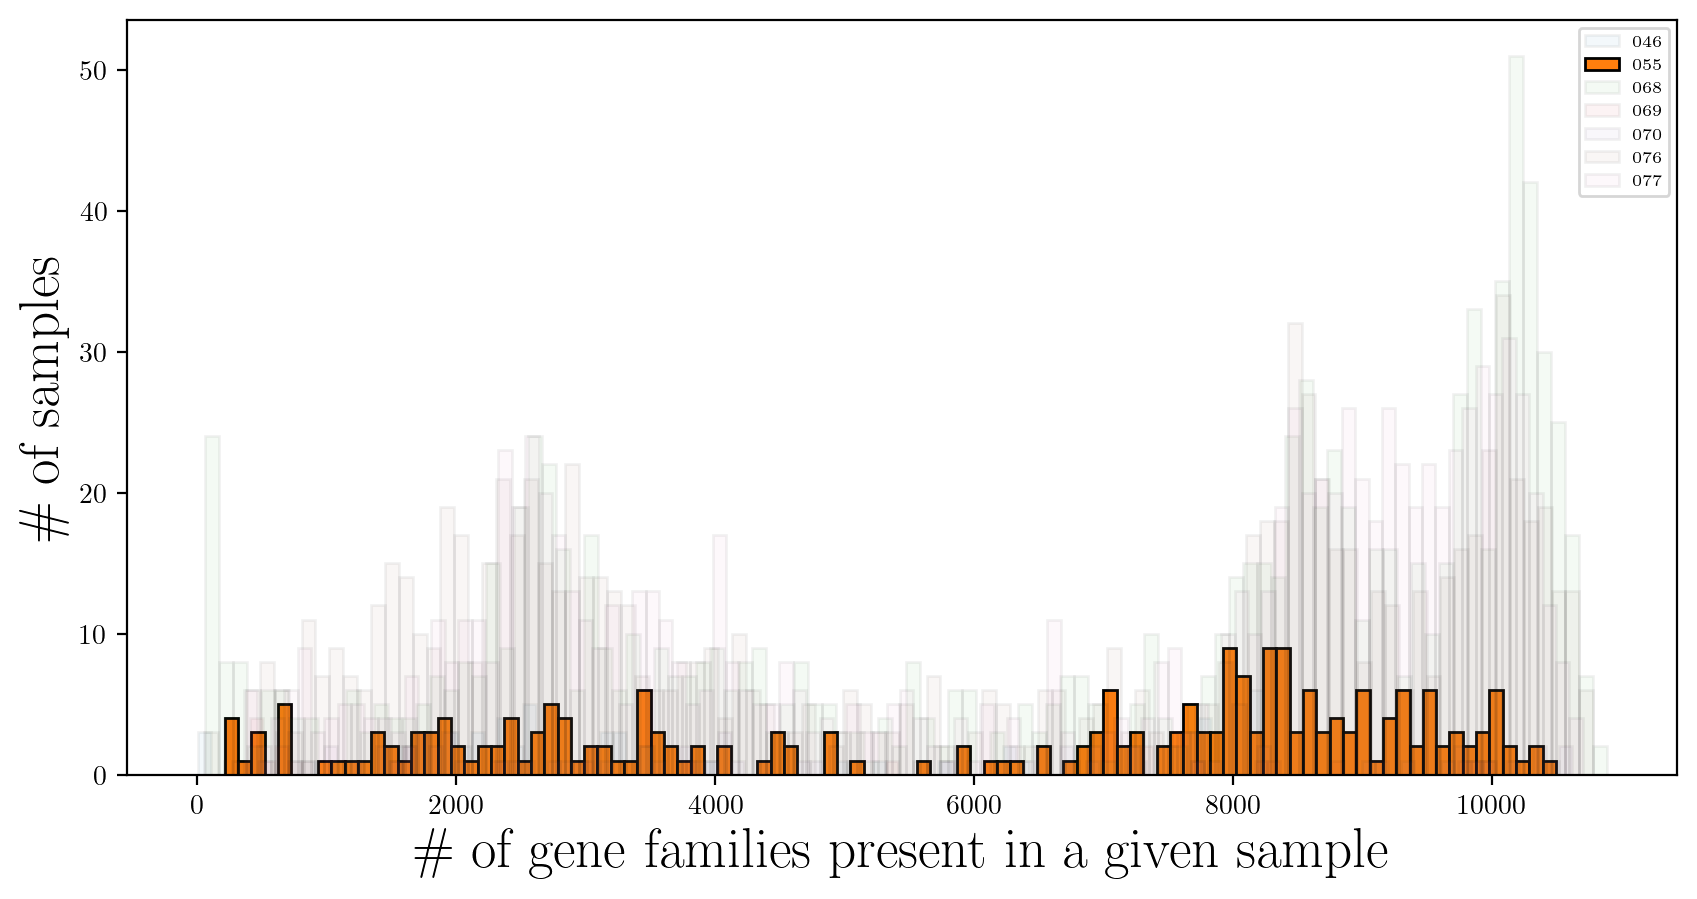

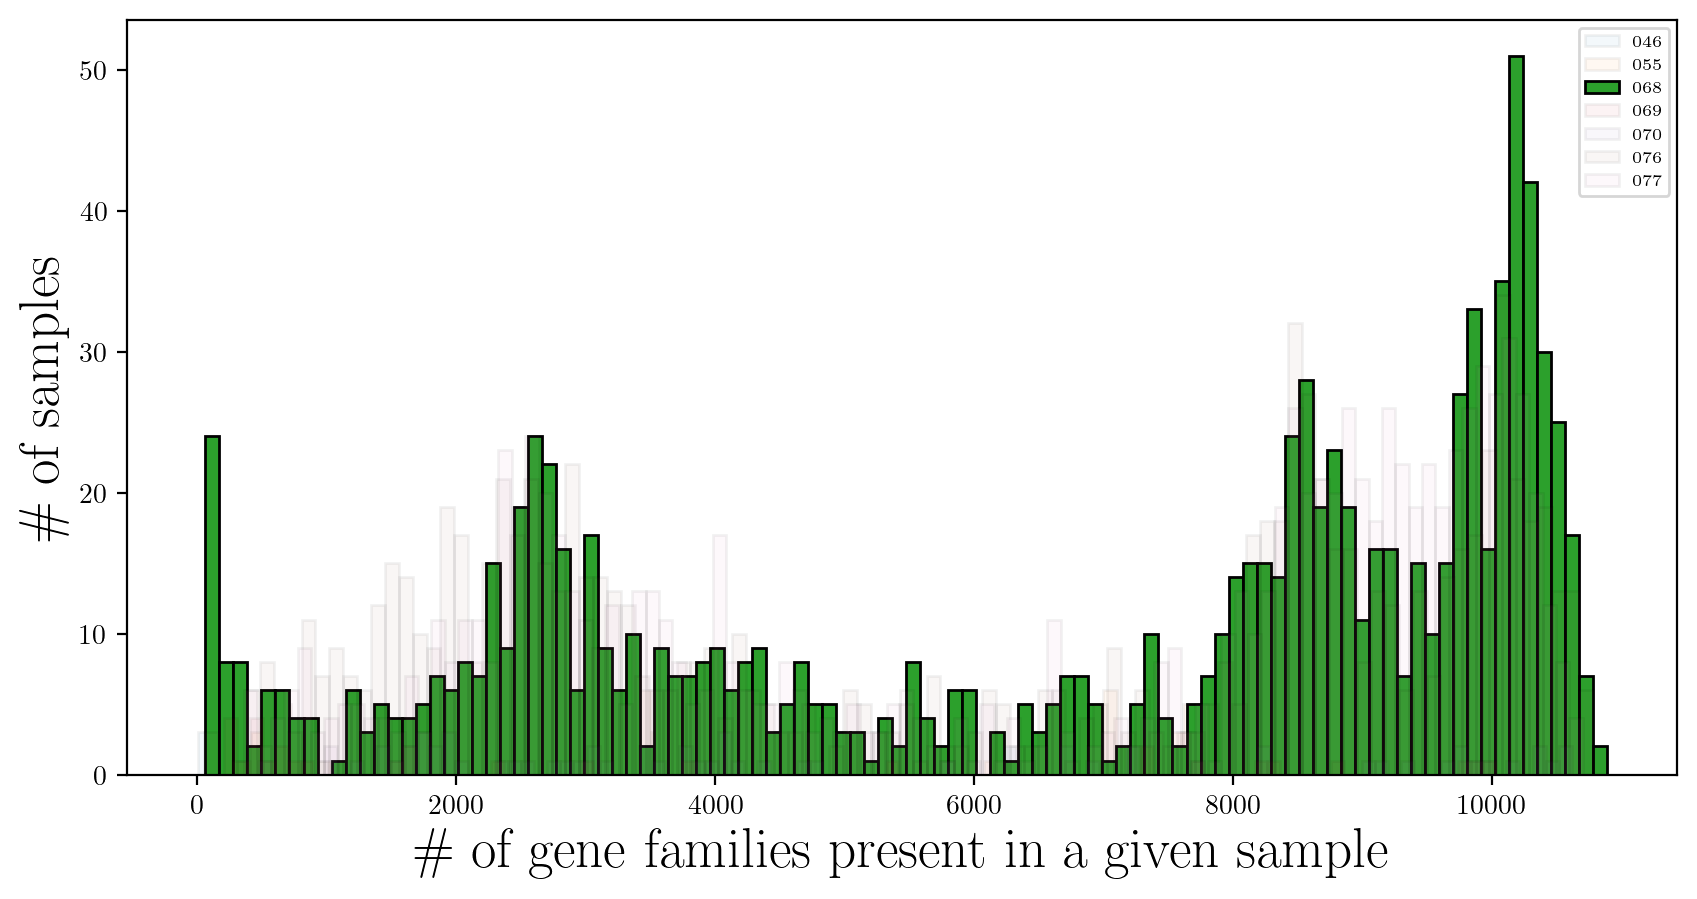

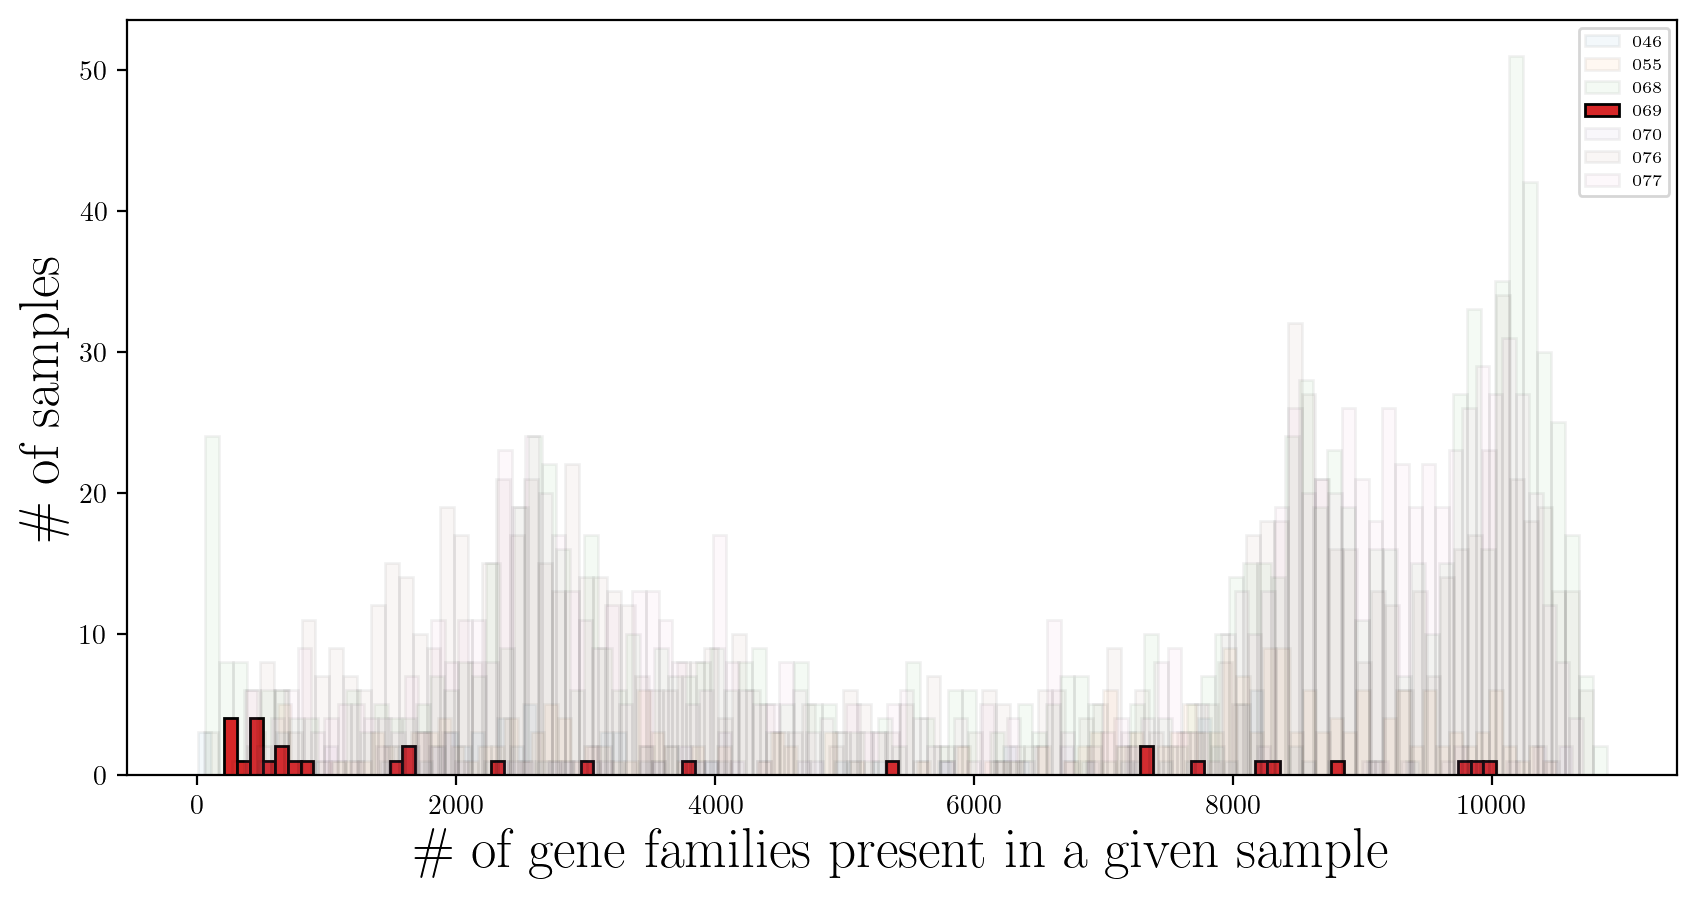

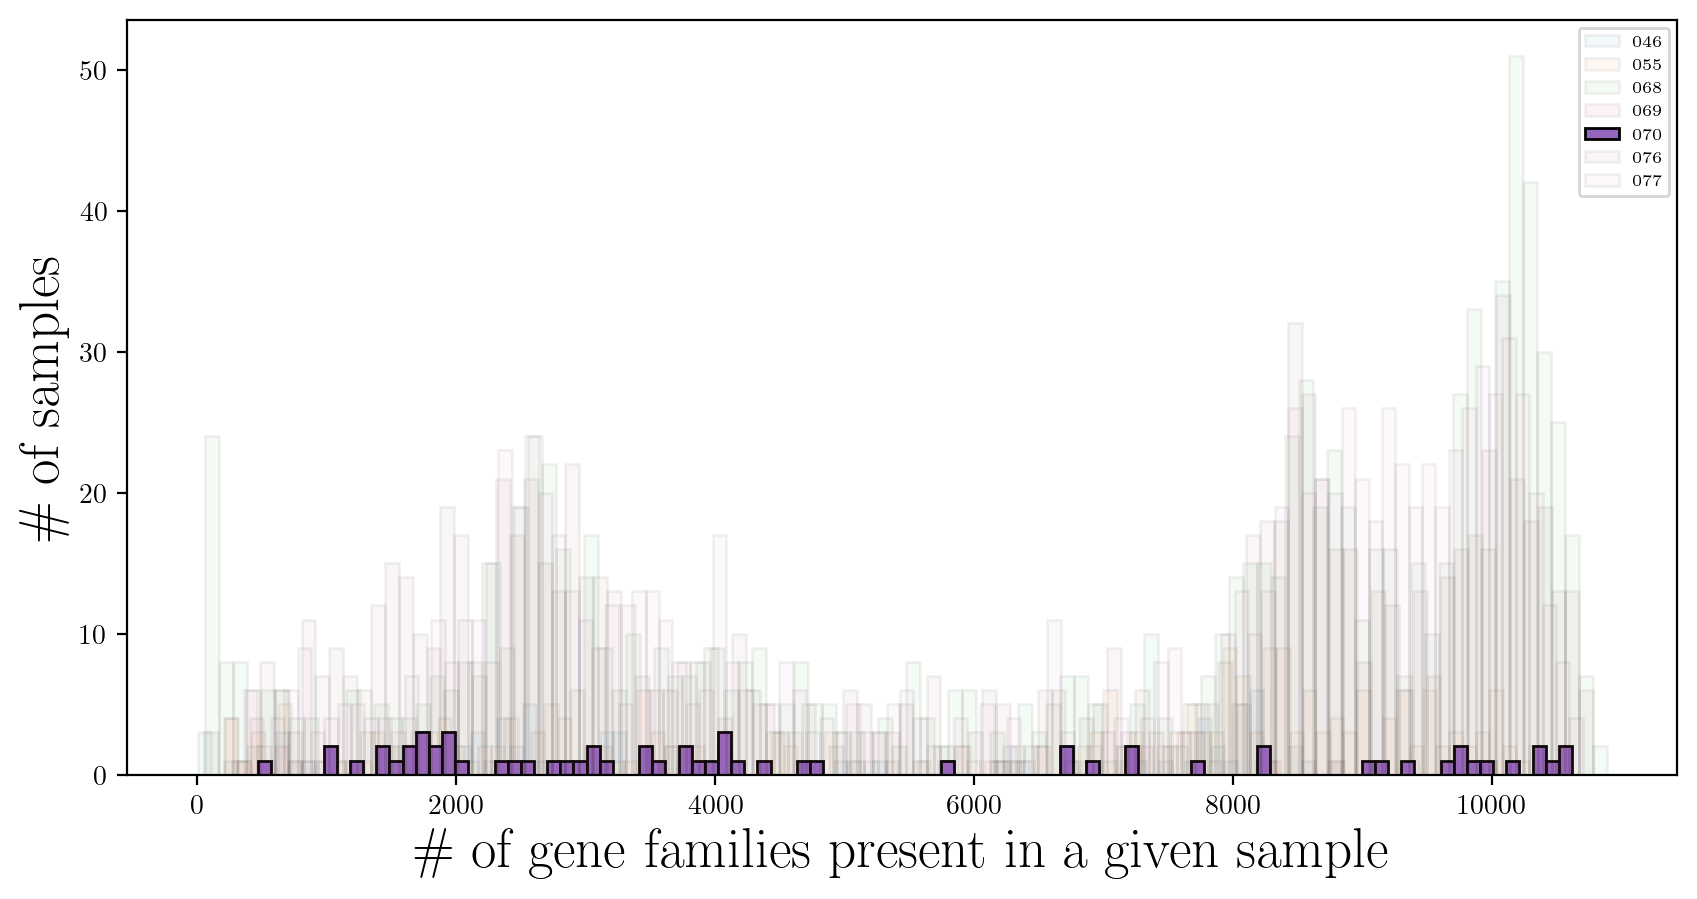

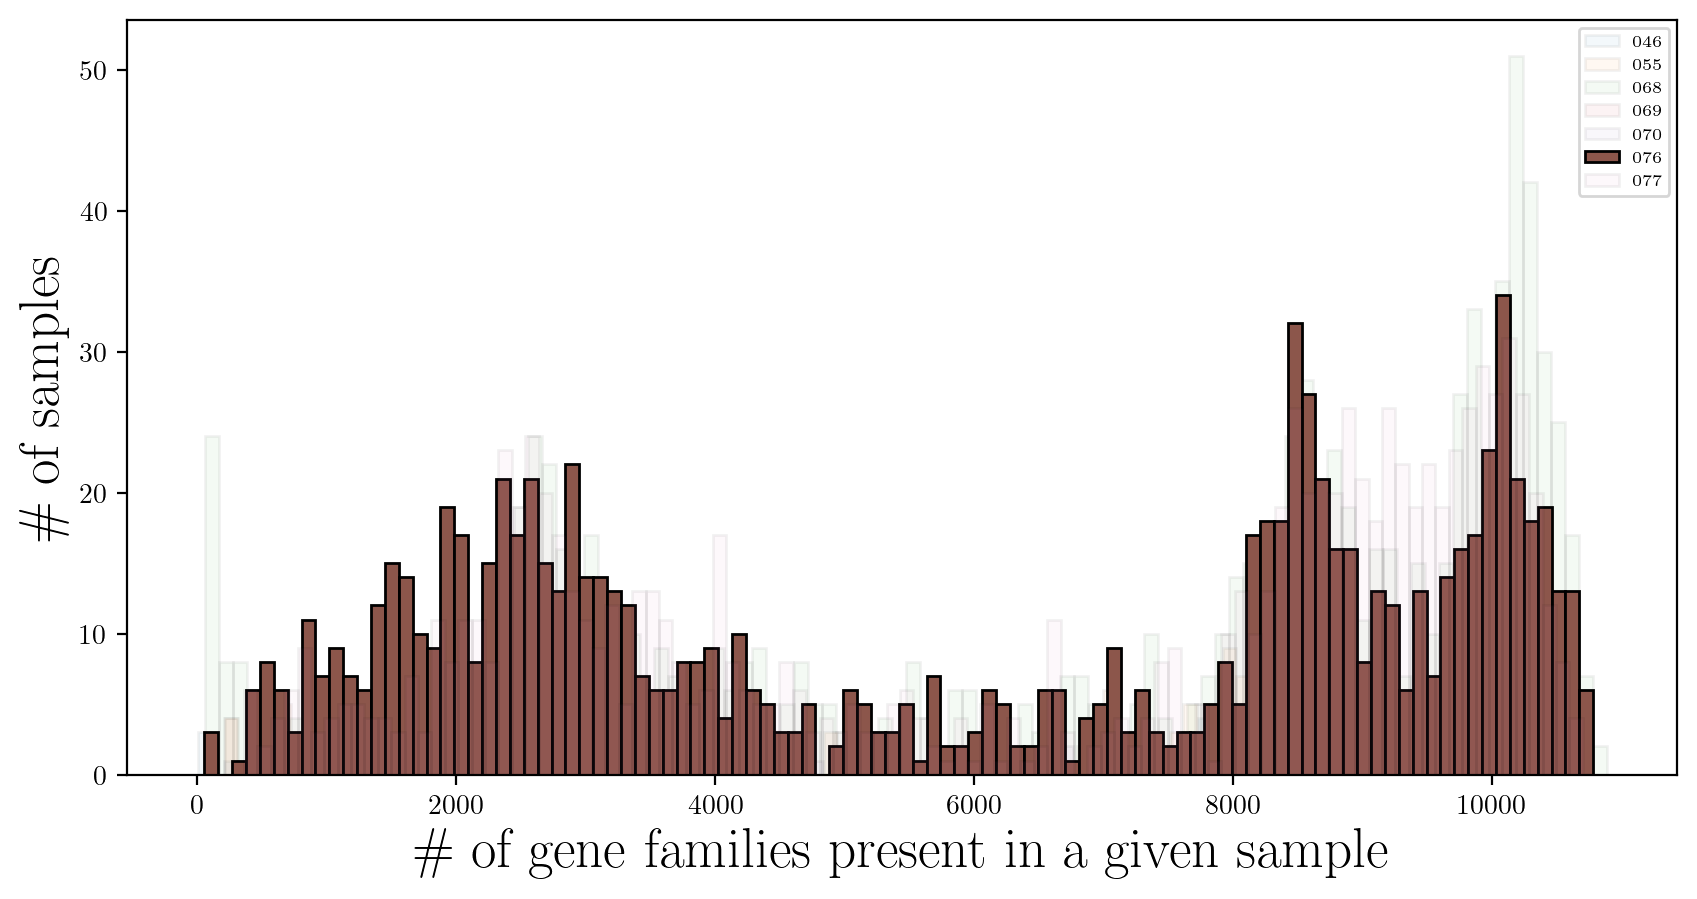

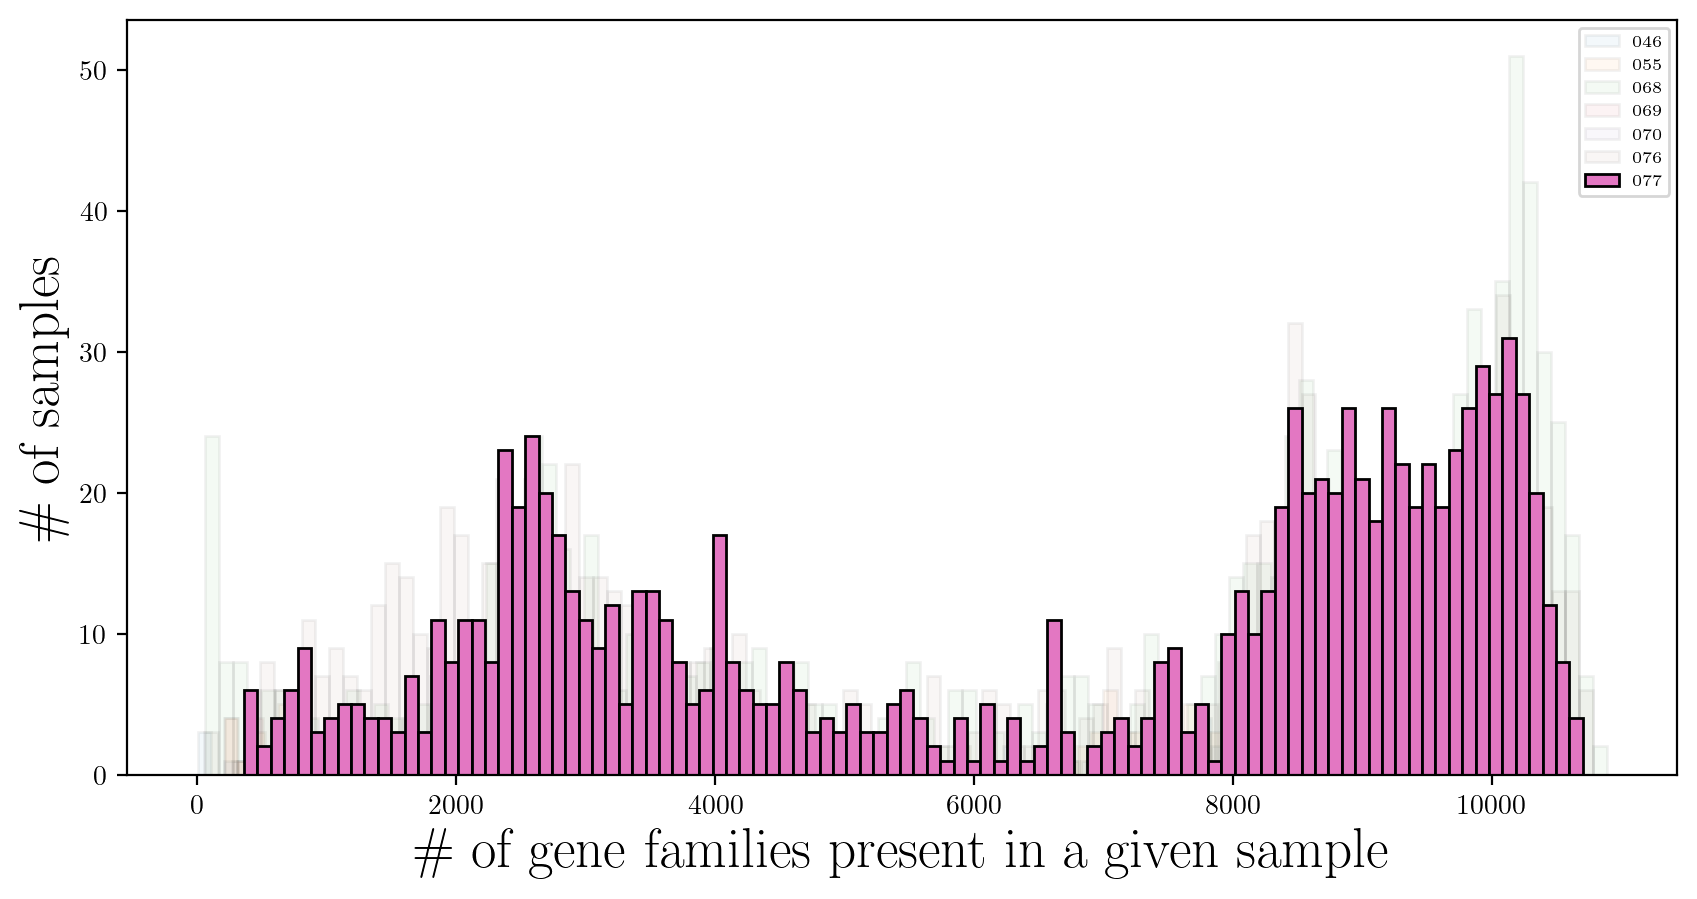

In [77]:
gene_presence = (gene_families_clean > 0)


for bold_project in np.unique(metadata["Sequencing_Project_num"]):
    plt.figure(figsize=(10, 5), dpi=200, facecolor="white")
    for project in np.unique(metadata["Sequencing_Project_num"]):
        counts = gene_presence[metadata["Sequencing_Project_num"] == project].sum(axis=1)

        alpha = 1 if project == bold_project else 0.05
        plt.hist(counts, bins=100, edgecolor="black", alpha=alpha, label=project.replace("_", "\_"))
        
    plt.legend(fontsize=6)

    plt.xlabel("\# of gene families present in a given sample", fontsize=20)
    plt.ylabel("\# of samples", fontsize=20)

    plt.savefig(os.path.join(config.FIGURE_DIR,  f"gene_richness_{bold_project}.png"), transparent=False)

Text(0.5, 0, 'Sequencing Project')

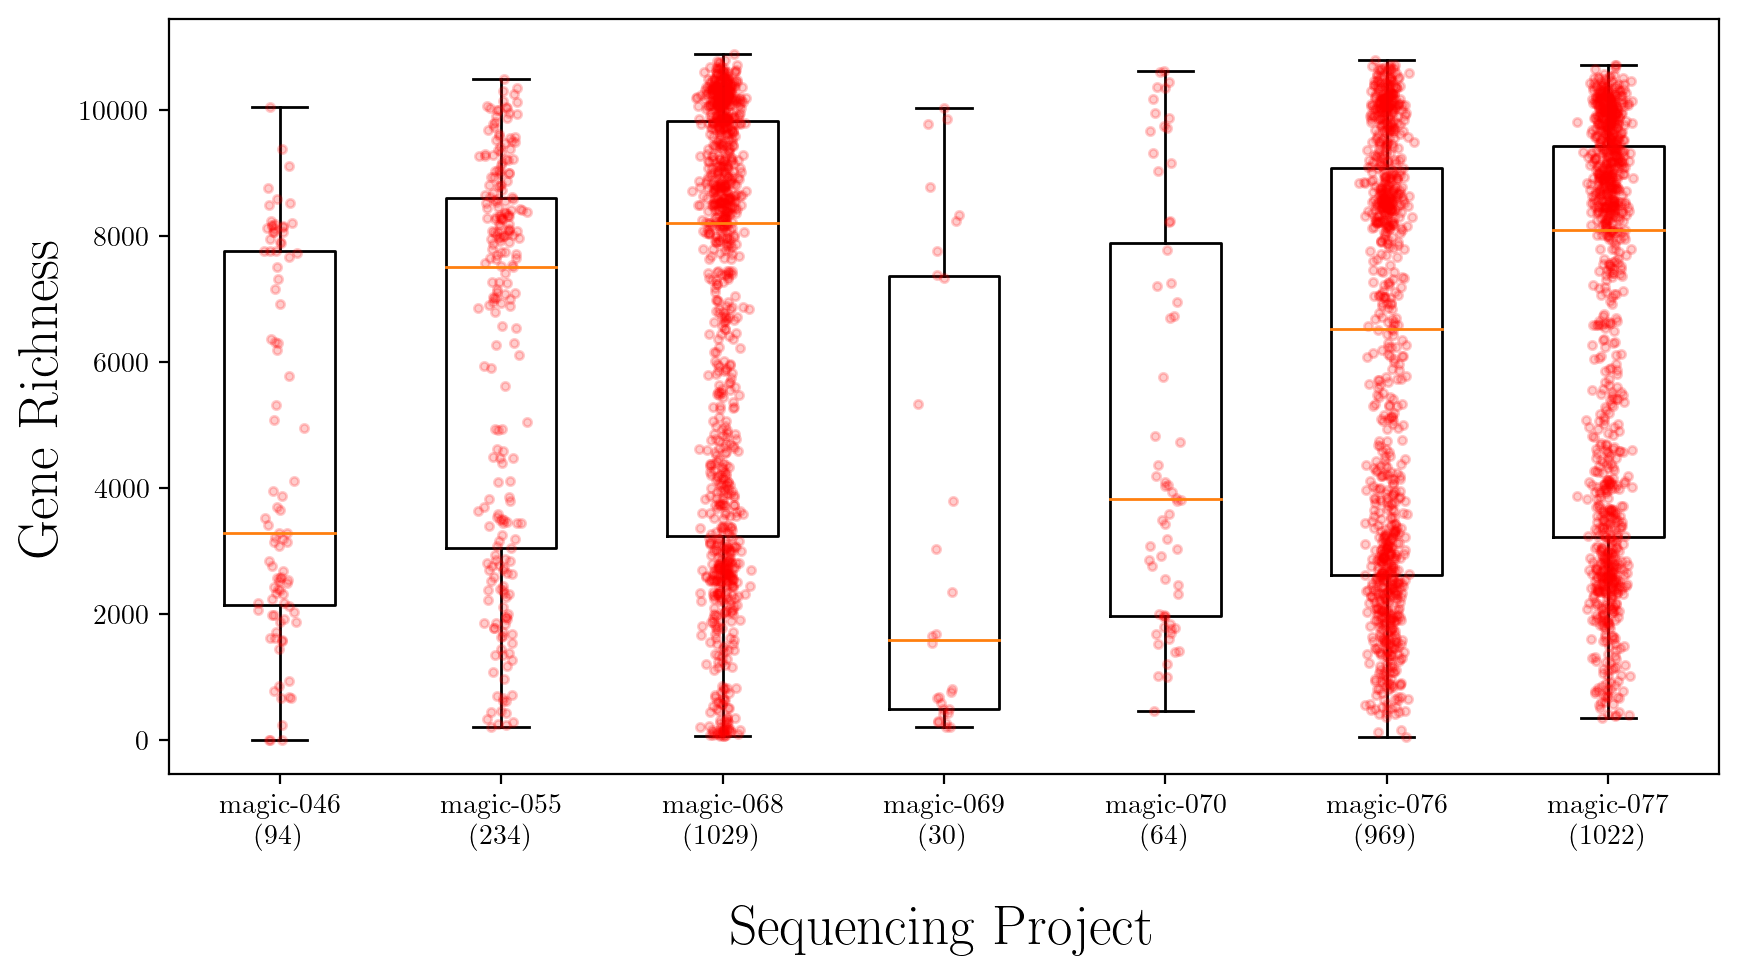

In [78]:
gene_presence = (gene_families_clean > 0)

plt.figure(figsize=(10, 5), dpi=200, facecolor="white")

projects = np.unique(metadata["Sequencing_Project_num"])
labels = ["magic-" + proj + f"\n({metadata[metadata['Sequencing_Project_num'] == proj].shape[0]})" for proj in projects]

plt.boxplot([gene_presence[metadata["Sequencing_Project_num"] == project].sum(axis=1) for project in projects],
            labels=labels, showfliers=False)

# add jitter
for i, project in enumerate(projects):
    richness_scores = gene_presence[metadata["Sequencing_Project_num"] == project].sum(axis=1)
    x = np.random.normal(i + 1, 0.04, size=richness_scores.shape[0])
    plt.plot(x, richness_scores, "r.", alpha=0.2)

plt.ylabel("Gene Richness", fontsize=20)
plt.xlabel("Sequencing Project", fontsize=20, labelpad=20)

In [79]:
metadata["Gene Richness"] = counts
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,Sequencing_Project_num,Gene Richness
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,046,NaN
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,046,NaN
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,076,NaN
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,076,NaN
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,055,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,077,3745.0
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,077,1928.0
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,077,4586.0


In [81]:
metadata["Gene Richness"] = (gene_families_clean > 0).sum(axis=1)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,Sequencing_Project_num,Gene Richness
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,046,7764
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,046,7753
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,076,2888
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,076,8650
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,055,7908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,077,3745
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,077,1928
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,077,4586


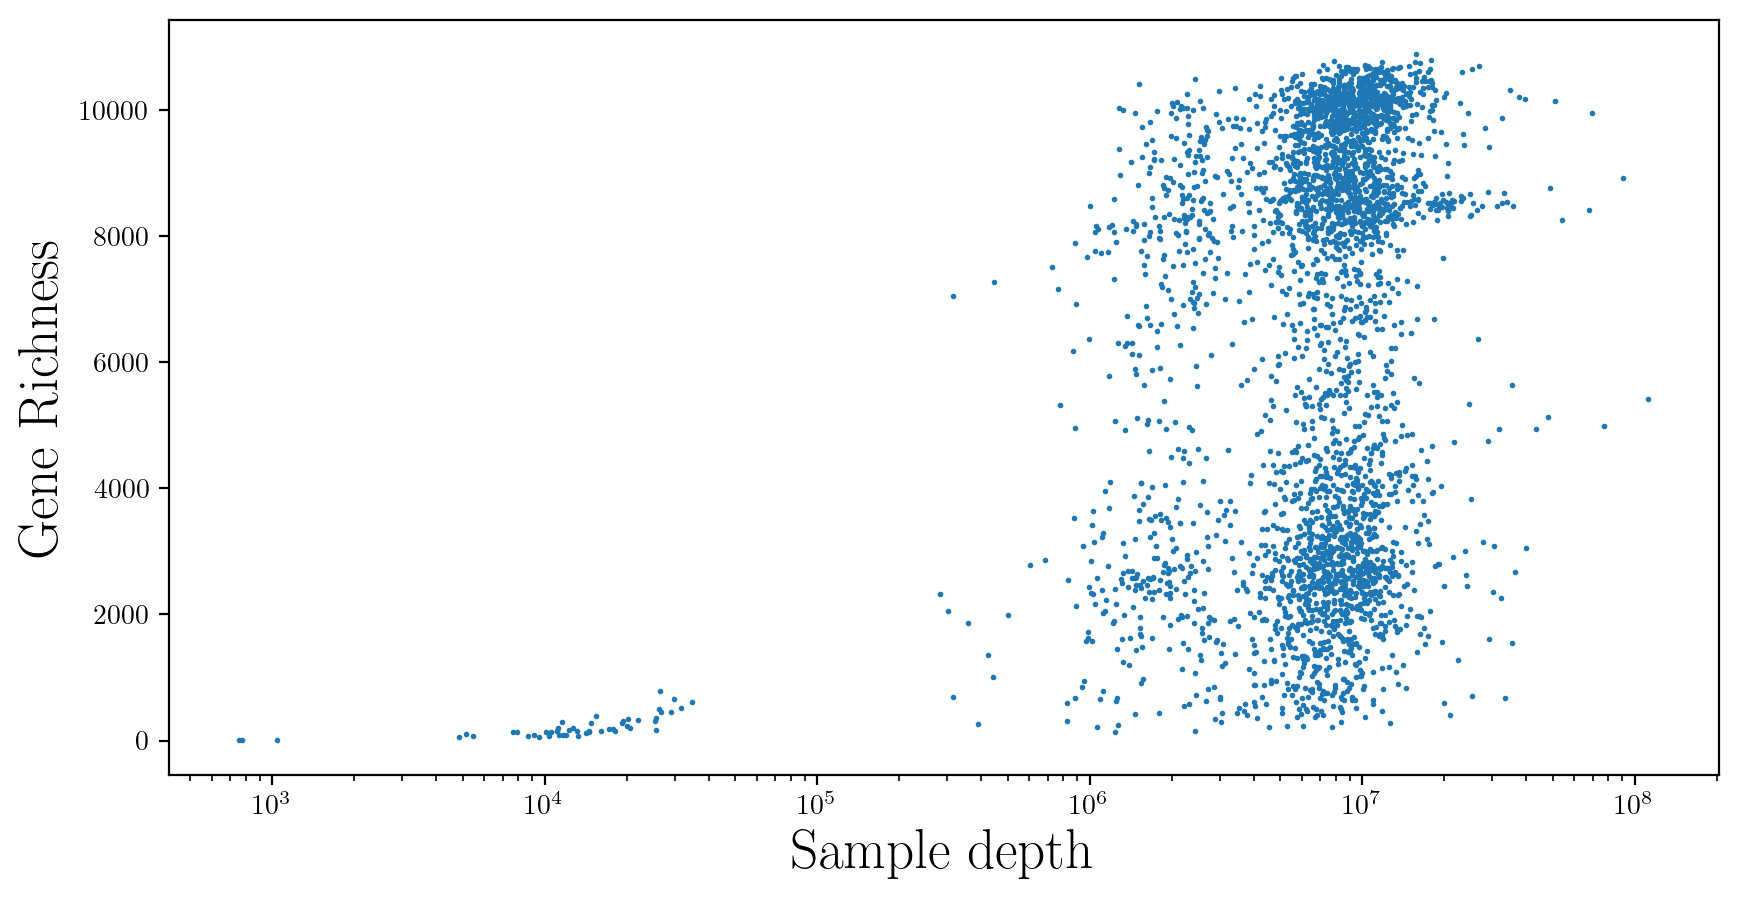

In [88]:
plt.figure(figsize=(10, 5), dpi=200)

plt.scatter(metadata["depth"], metadata["Gene Richness"], s=1)
plt.xlabel("Sample depth", fontsize=20)
plt.ylabel("Gene Richness", fontsize=20)

plt.xscale("log")